# WordCloud Constitución Política de la República de Chile de 1980


### Instalar e importar librerías
Comenzamos importando todas las librerías necesarias para el análisis de texto.

In [1]:
#Librerías para abrir y leer pdf
import pdfminer
import io
from pdfminer.converter import TextConverter
from pdfminer.pdfinterp import PDFPageInterpreter
from pdfminer.pdfinterp import PDFResourceManager
from pdfminer.pdfpage import PDFPage

#Librerías básicas utilizadas
import numpy as np
import pandas as pd
import matplotlib

#Librerías necesarias para abrir imágenes, generar nube de palabras y plot
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
#matplotlib.use('SVG') #set the backend to SVG

#Librerías necesarias para la limpieza de datos
import string
import nltk
from nltk.corpus import stopwords
#nltk.download('stopwords') #Si es primera vez utilizando stopwords, estas deben descargarse

Se define la función _extract_text_from_pdf_ que nos ayudará a extraer el texto completo del pdf a analizar. 

In [2]:
def extract_text_from_pdf(pdf_path):
    resource_manager = PDFResourceManager()
    fake_file_handle = io.StringIO()
    converter = TextConverter(resource_manager, fake_file_handle)
    page_interpreter = PDFPageInterpreter(resource_manager, converter)
    with open(pdf_path, 'rb') as fh:
        for page in PDFPage.get_pages(fh, 
                                      caching=True,
                                      check_extractable=True):
            page_interpreter.process_page(page)
        texto = fake_file_handle.getvalue()
    # close open handles
    converter.close()
    fake_file_handle.close()
    if texto:
        return texto

### Extracción del texto pdf
El archivo pdf lo puedes encontrar en el repositorio https://github.com/YachayData/yachay/blob/c9089f6937154a421c2b77c25270776d7d7198e1/constitucion/Constituci%C3%B3n%201980/Constituci%C3%B3n_1980.pdf

In [3]:
texto = extract_text_from_pdf(r'Constitución_1980.pdf')
texto[:500]

'Decreto 100 (2005)Biblioteca del Congreso Nacional de Chile - www.leychile.cl - documento generado el 23-Jun-2022página 1 de 82Decreto 100FIJA EL TEXTO REFUNDIDO, COORDINADO Y SISTEMATIZADO DE LACONSTITUCION POLITICA DE LA REPUBLICA DE CHILEMINISTERIO SECRETARÍA GENERAL DE LA PRESIDENCIAPublicación: 22-SEP-2005 | Promulgación: 17-SEP-2005Versión: Última Versión De : 29-ABR-2022Ultima Modificación: 29-ABR-2022 Ley 21448Url Corta: http://bcn.cl/30itu      FIJA EL TEXTO REFUNDIDO, COORDINADO Y SIST'

### Procesamiento del texto
Nos damos cuenta que hay palabras irrelevantes, stopwords, link y signos de puntuación que deben eliminarse para obtener sólo la información que nos interesa. 

In [4]:
#Generación de lista de signos de puntuación
punctuation=[]
for s in string.punctuation:
    punctuation.append(str(s))
sp_punctuation = ["¿", "¡", "“", "”", "…", ":", "–", "»", "«", "°", "º"]    
punctuation += sp_punctuation

#Generación de lista de stopwords
stop_words = stopwords.words('spanish') #Listado de palabras a eliminar
stop_words += ["artículo", "para", "como", "puede","cómo", "hacer", "forma", "parte", "hace",
               "además", "según", "pueden", "ser", "así", "podrá", "deberá", "podrán", "demás", 
              "deberán", "23jun2022página", "2005biblioteca", "wwwleychilecl", "n",
              "cada", "dos", '100', 'número', 'siguientes', 'respectiva', 'días',
              'anterior', 'sólo', 'tres', '2017', 'asimismo', 'cinco', '2021',
              'dicha', 'si', 'toda', 'día', 'dentro'] #Añadimos algunos caractéres que hemos encontrado en el wordcloud que no son relevantes

#Reemplazamos signos de puntuación por "":
for p in punctuation:
    clean_texto = texto.lower().replace(p,"")
for p in punctuation:
    clean_texto = clean_texto.replace(p,"")
    
#Eliminamos espacios blancos, saltos de línea, tabuladores, etc    
clean_texto = " ".join(clean_texto.split())   

#Reemplazamos stop_words por "":    
for stop in stop_words:
    clean_texto_list = clean_texto.split()
    clean_texto_list = [i.strip() for i in clean_texto_list]
    try:
        while stop in clean_texto_list: clean_texto_list.remove(stop)
    except:
        print("Error")
        pass
    clean_texto= " ".join(clean_texto_list)
    
#Paso intermedio para eliminar palabras muy cortas (emoticonos,etc) y muy largas (ulr o similar) que se nos hayan pasado:
lista_texto = clean_texto.split(" ")
palabras = []

for palabra in lista_texto:
    if (len(palabra)>=3 and len(palabra)<18):
        palabras.append(palabra)

In [5]:
clean_texto[500:1500]

'ispuesto 32 n8 constituciónpolítica 1980 decreto fíjase siguiente texto refundido coordinado sistematizado laconstitución política república capítulo i bases institucionalidad 1 personas nacen libres iguales dignidad derechos familia núcleo fundamental sociedad reconoce ampara grupos intermedios través cuales seorganiza estructura sociedad garantiza adecuada autonomía cumplirsus propios fines específicos servicio persona humana finalidad promover elbien común debe contribuir crear condiciones sociales quepermitan integrantes comunidad nacional mayorrealización espiritual material posible pleno respeto derechos ygarantías constitución establece deber resguardar seguridad nacional dar protección lapoblación familia propender fortalecimiento ésta promover laintegración armónica sectores nación asegurar derecho delas personas participar igualdad oportunidades vida nacional 2 emblemas nacionales bandera nacional escudo armasde república himno nacional 3 chile unitario administración funcio

### Análisis de texto
Se contabilizan las palabras del texto, para luego realizar la nube de palabras más frecuentes.

In [6]:
#Generamos un diccionario para contabilizar las palabras:
word_count={}

for palabra in palabras:
    if palabra in word_count.keys():
        word_count[palabra][0]+=1
    else:
        word_count[palabra]=[1]
        
#Generamos el DF y lo ordenamos:
df = pd.DataFrame.from_dict(word_count).transpose()
df.columns=["freq"]
df.sort_values(["freq"], ascending=False, inplace=True)
df.head(7)

,freq
ley,409
nacional,181
presidente,180
constitucional,177
república,167
decreto,163
congreso,143


### Generamos la nube de la palabras
Luego de realizar la limpieza al texto base, se genera la nube de palabras.

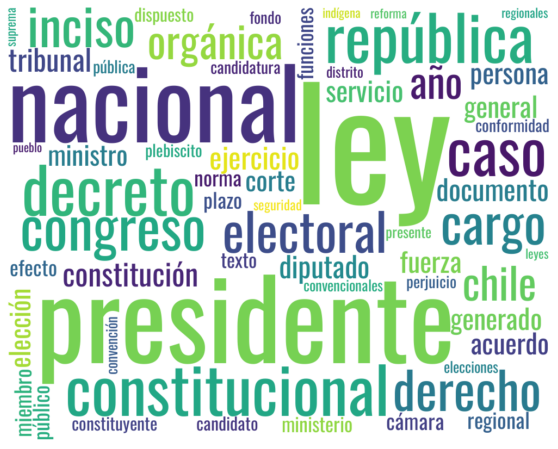

In [7]:
font = 'Oswald-VariableFont_wght.ttf'
word_cloud = WordCloud(height=800, width=1000, background_color='white',max_words=60,
                       min_font_size=5, collocation_threshold=30, collocations=False, 
                      random_state=11, font_path = font).generate(clean_texto) 

fname = "WordCloud_Constitución1980.png"
plt.imshow(word_cloud, interpolation="bilinear") 
plt.axis("off")
fig = plt.gcf() #get current figure
fig.set_size_inches(10,8) 
plt.savefig(fname, dpi=700)
plt.show()

In [8]:
#Para obtener código .svg
word_cloud.to_svg(embed_font=True)